In [1]:
import keras
import numpy as np
from   sklearn.datasets import make_classification
from   sklearn.model_selection import train_test_split

2024-03-04 20:20:43.642129: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 20:20:43.684555: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 20:20:43.684587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 20:20:43.685718: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 20:20:43.691742: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 20:20:43.692212: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
X, y = make_classification(n_samples=2000, n_features=4, random_state=32)

In [3]:
X.shape

(2000, 4)

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.25)

In [5]:
xtrain.shape[1:]

(4,)

In [6]:
from keras_tuner import HyperParameters
def buildModel(hp:HyperParameters):
    #
    n_hidden  = hp.Int(name='n_hidden', min_value=4, max_value=6 ,step=1)
    n_neurons = hp.Int(name='n_neurons', min_value=4,max_value=32, step=4)

    #
    model = keras.models.Sequential()

    model.add(
        keras.layers.InputLayer(input_shape=xtrain.shape[1:])
    )
    
    for _ in range(n_hidden):
        model.add(
            keras.layers.Dense( units=n_neurons , activation='relu')
        )
    
    model.add( keras.layers.Dense( units=1 , activation='relu') )

    model.compile(
        optimizer = keras.optimizers.SGD(),
        loss      = keras.losses.binary_crossentropy,
        metrics   = ['accuracy',keras.metrics.binary_accuracy] 
    )
    return model

In [7]:
from keras_tuner import RandomSearch

grid = RandomSearch(
    buildModel,
    objective='val_accuracy',
    max_trials=5,
    directory='Opt',
    project_name='Example1'
    )

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
grid.search( xtrain, ytrain, epochs=20, validation_split=0.1, callbacks=[stop_early])

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.5400000214576721

Best val_accuracy So Far: 0.9599999785423279
Total elapsed time: 00h 00m 19s


In [19]:
best = grid.get_best_models()[0]

In [23]:
history = best.fit(xtrain, ytrain, epochs=20,batch_size=10 ,validation_split=0.1)

Epoch 1/20
135/135 [==============================] - 0s 2ms/step - loss: 7.6553 - accuracy: 0.5037 - binary_accuracy: 0.5037 - val_loss: 7.0955 - val_accuracy: 0.5400 - val_binary_accuracy: 0.5400
Epoch 2/20
135/135 [==============================] - 0s 2ms/step - loss: 7.6553 - accuracy: 0.5037 - binary_accuracy: 0.5037 - val_loss: 7.0955 - val_accuracy: 0.5400 - val_binary_accuracy: 0.5400
Epoch 3/20
135/135 [==============================] - 0s 2ms/step - loss: 7.6553 - accuracy: 0.5037 - binary_accuracy: 0.5037 - val_loss: 7.0955 - val_accuracy: 0.5400 - val_binary_accuracy: 0.5400
Epoch 4/20
135/135 [==============================] - 0s 2ms/step - loss: 7.6553 - accuracy: 0.5037 - binary_accuracy: 0.5037 - val_loss: 7.0955 - val_accuracy: 0.5400 - val_binary_accuracy: 0.5400
Epoch 5/20
135/135 [==============================] - 0s 2ms/step - loss: 7.6553 - accuracy: 0.5037 - binary_accuracy: 0.5037 - val_loss: 7.0955 - val_accuracy: 0.5400 - val_binary_accuracy: 0.5400
Epoch 6/20

<Axes: >

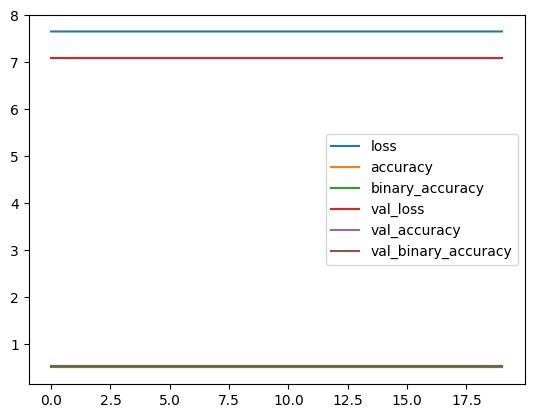

In [24]:
import pandas as pd 

pd.DataFrame(history.history).plot()